In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.rename(columns={'v1':'target','v2':'sms'})

In [5]:
df.shape

(5572, 5)

## __1. Data Cleaning__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   object
 1   sms         5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [8]:
data.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data = pd.get_dummies(data, columns=['target'])

In [10]:
data.head()

,sms,target_ham,target_spam
0,"Go until jurong point, crazy.. Available only ...",True,False
1,Ok lar... Joking wif u oni...,True,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,False,True
3,U dun say so early hor... U c already then say...,True,False
4,"Nah I don't think he goes to usf, he lives aro...",True,False


In [11]:
data['target_spam'] = data['target_spam'].replace({True:1,False:0})

C:\Users\shiva\AppData\Local\Temp\ipykernel_12612\1580115555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['target_spam'] = data['target_spam'].replace({True:1,False:0})


In [12]:
data.head()

,sms,target_ham,target_spam
0,"Go until jurong point, crazy.. Available only ...",True,0
1,Ok lar... Joking wif u oni...,True,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,False,1
3,U dun say so early hor... U c already then say...,True,0
4,"Nah I don't think he goes to usf, he lives aro...",True,0


In [13]:
del data['target_ham']

In [14]:
data.head()

,sms,target_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sms          5572 non-null   object
 1   target_spam  5572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [16]:
data.isnull().sum()

sms            0
target_spam    0
dtype: int64

In [17]:
data.duplicated().sum()

403

In [18]:
data = data.drop_duplicates()

In [19]:
data.duplicated().sum()

0

In [20]:
data.shape

(5169, 2)

## __2. Exploratory data analysis__

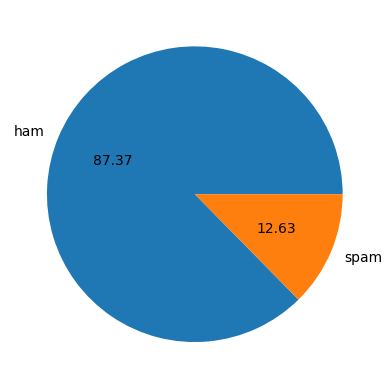

In [21]:
plt.pie(data['target_spam'].value_counts(),labels = ['ham','spam'],autopct="%0.2f")
plt.show()

__Data is imbalanced__

In [22]:
import nltk

we have to make 3 new column
1. No of characters in the sms
2. No of words in the sms 
3. No of sms in the sms

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
data.head()

,sms,target_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
data['num_characters']=data['sms'].apply(len)

In [26]:
data.head()

,sms,target_spam,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [27]:
data['num_word']=data['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
data.head()

,sms,target_spam,num_characters,num_word
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [29]:
data['num_sentence'] = data['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
data.head()

,sms,target_spam,num_characters,num_word,num_sentence
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [31]:
data[['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
data.head()

,sms,target_spam,num_characters,num_word,num_sentence
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [33]:
data[data['target_spam']==0][['num_characters','num_word','num_sentence']].describe()    #ham msg

,num_characters,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
data[data['target_spam']==1][['num_characters','num_word','num_sentence']].describe()   #spam msg

,num_characters,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

<Axes: ylabel='Count'>

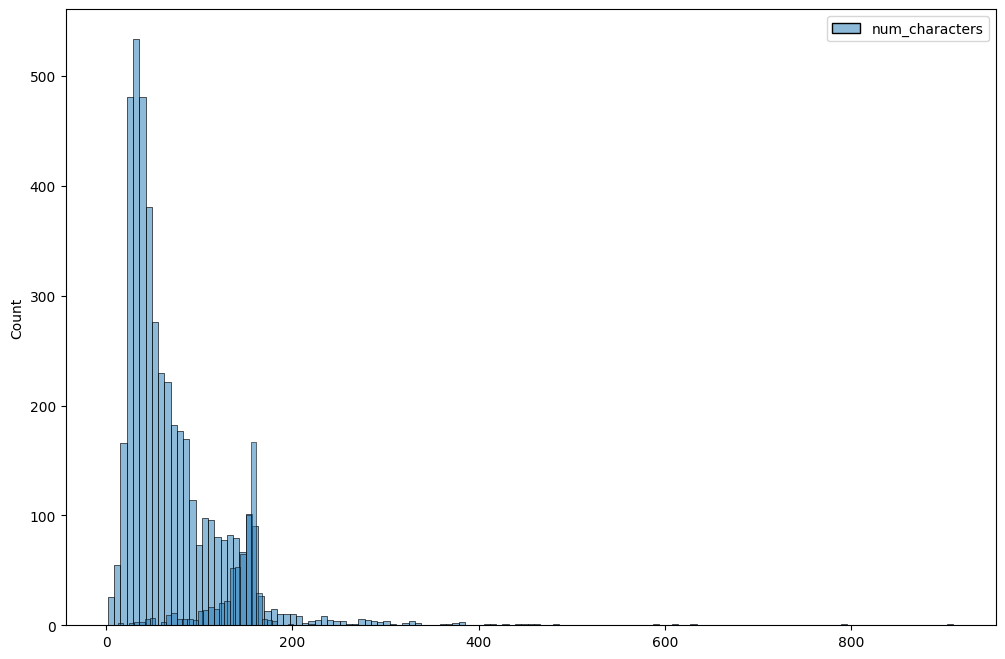

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target_spam']==0][['num_characters']])
sns.histplot(data[data['target_spam']==1][['num_characters']],color="pink")

<Axes: ylabel='Count'>

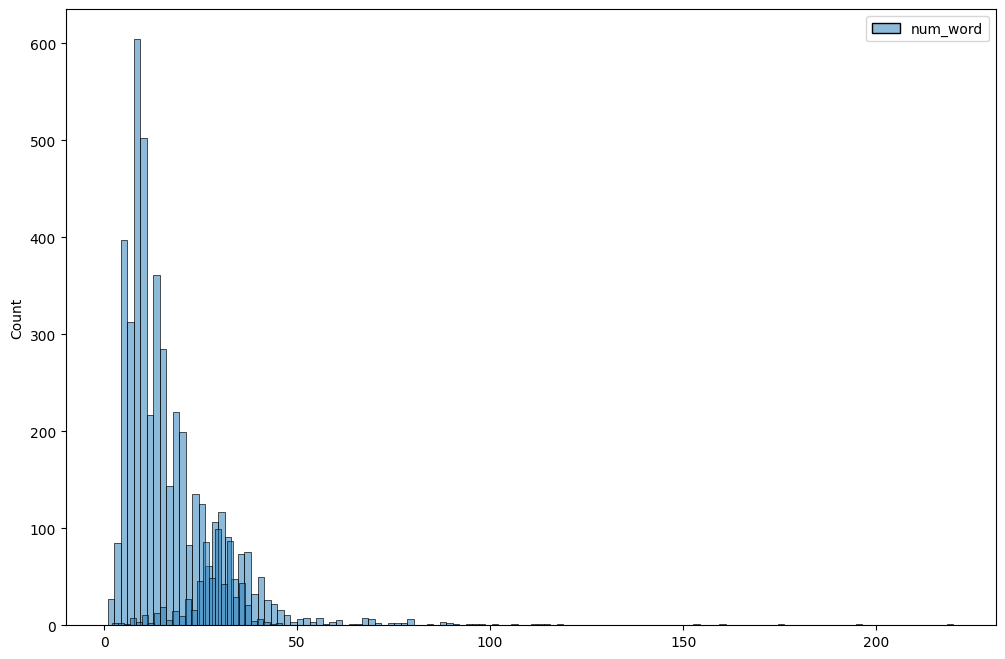

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target_spam']==0][['num_word']])
sns.histplot(data[data['target_spam']==1][['num_word']],color='red')

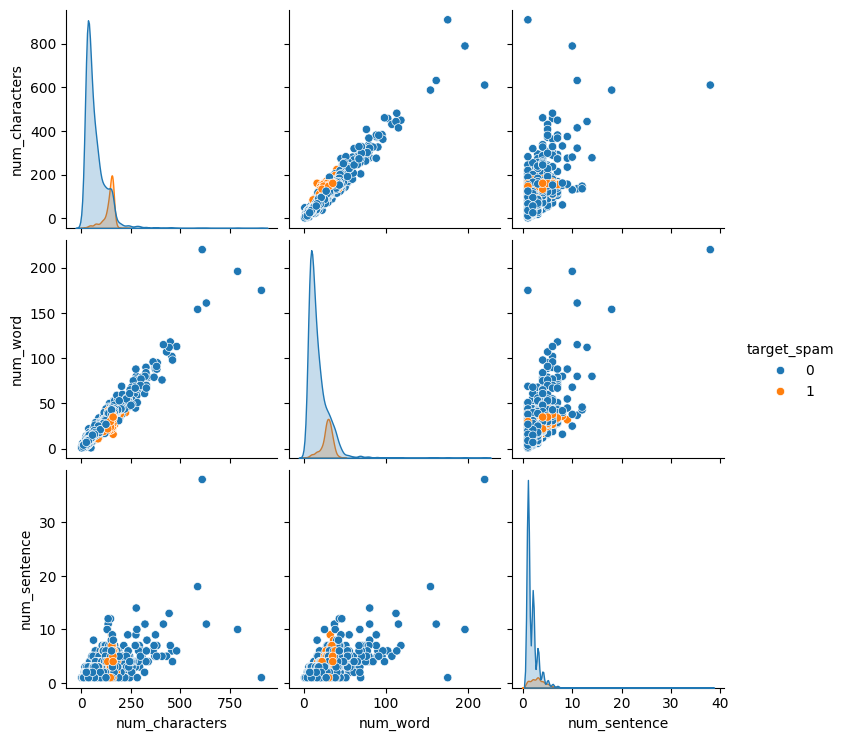

In [38]:
sns.pairplot(data,hue="target_spam")

In [39]:
data[['target_spam','num_characters','num_word','num_sentence']].corr()

,target_spam,num_characters,num_word,num_sentence
target_spam,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_word,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

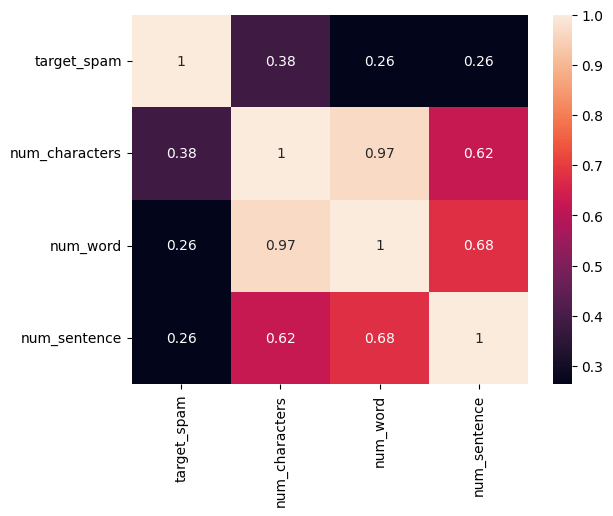

In [40]:
sns.heatmap(data[['target_spam','num_characters','num_word','num_sentence']].corr(),annot=True)

## __3. Data Preprocessing__

In [41]:
import string 
punctuation = string.punctuation

In [42]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
stop_words = stopwords.words('english') 

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
def transform_text(text):
    text = text.lower()        #for lower case
    text = nltk.word_tokenize(text)                           #for tokenization
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stop_words and i not in punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y) 

In [46]:
data['transform_sms'] = data['sms'].apply(transform_text)

In [47]:
data.head()

,sms,target_spam,num_characters,num_word,num_sentence,transform_sms
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud

In [49]:
wc = WordCloud(width = 3000, height = 3000,min_font_size=10, background_color="black")

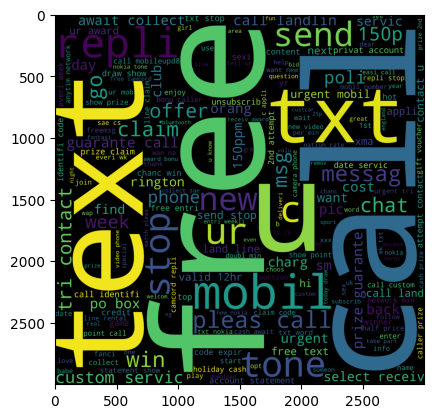

In [50]:
spam_wc = wc.generate(data[data['target_spam']==1]['transform_sms'].str.cat(sep=" "))
plt.imshow(spam_wc)

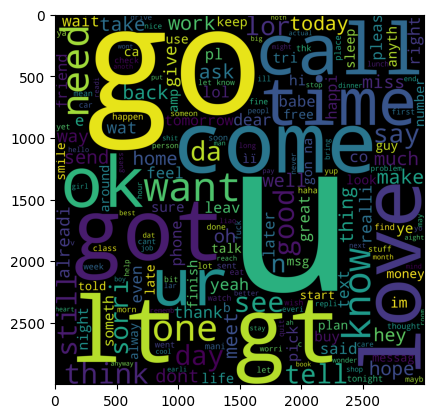

In [51]:
ham_wc = wc.generate(data[data['target_spam']==0]['transform_sms'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [52]:
data.head(5)

,sms,target_spam,num_characters,num_word,num_sentence,transform_sms
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [53]:
spam_corpus = []
for msg in data[data['target_spam'] == 1]['transform_sms'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

In [55]:
from collections import Counter
spam_data = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_data.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


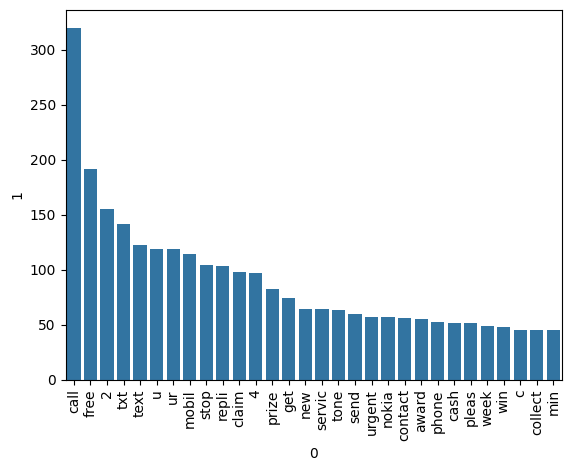

In [56]:
sns.barplot(spam_data,x=spam_data[0],y=spam_data[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in data[data['target_spam'] == 0]['transform_sms'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

In [59]:
ham_data = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_data.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


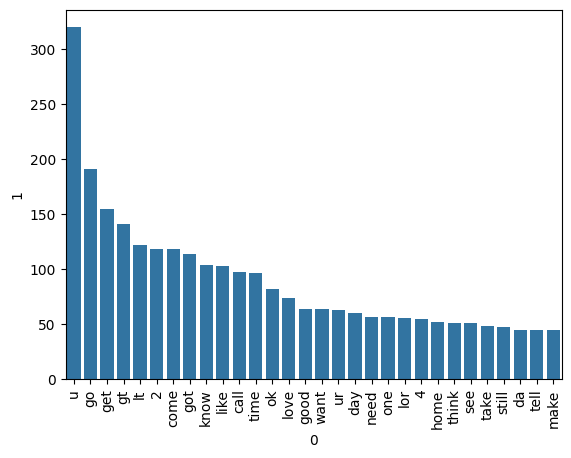

In [60]:
sns.barplot(ham_data,x=ham_data[0],y=spam_data[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [61]:
data.head()

,sms,target_spam,num_characters,num_word,num_sentence,transform_sms
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


## __4. Model Building__

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
vectorizer = TfidfVectorizer(max_features=2500)

In [64]:
X = vectorizer.fit_transform(data['sms']).toarray()

In [65]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [66]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [67]:
X.shape

(5169, 2500)

In [68]:
Y = data['target_spam'].values

In [69]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lrc = LogisticRegression(solver='liblinear')
svc = SVC(kernel='sigmoid', gamma=1.0)

In [74]:
clfs = {
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'LRC': lrc,
    'SVC': svc
}

In [75]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) 
    return accuracy, precision

In [76]:
accuracy_scores = []
precision_scores = []


for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ",name)
    print("Accuracy -",current_accuracy)
    print("Precision -",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GNB
Accuracy - 0.8849129593810445
Precision - 0.543778801843318
For  MNB
Accuracy - 0.9738878143133463
Precision - 1.0
For  BNB
Accuracy - 0.9864603481624759
Precision - 0.9769230769230769
For  LRC
Accuracy - 0.9671179883945842
Precision - 0.9905660377358491
For  SVC
Accuracy - 0.9816247582205029
Precision - 0.983739837398374


In [77]:
performance_df = pd.DataFrame({'Algo' : clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [78]:
performance_df

,Algo,Accuracy,Precision
0,GNB,0.884913,0.543779
1,MNB,0.973888,1.000000
2,BNB,0.986460,0.976923
3,LRC,0.967118,0.990566
4,SVC,0.981625,0.983740


In [79]:
performance_long_df = pd.melt(performance_df, id_vars=['Algo'], var_name='variable', value_name='value')
performance_long_df

,Algo,variable,value
0,GNB,Accuracy,0.884913
1,MNB,Accuracy,0.973888
2,BNB,Accuracy,0.986460
3,LRC,Accuracy,0.967118
4,SVC,Accuracy,0.981625
5,GNB,Precision,0.543779
6,MNB,Precision,1.000000
7,BNB,Precision,0.976923
8,LRC,Precision,0.990566
9,SVC,Precision,0.983740


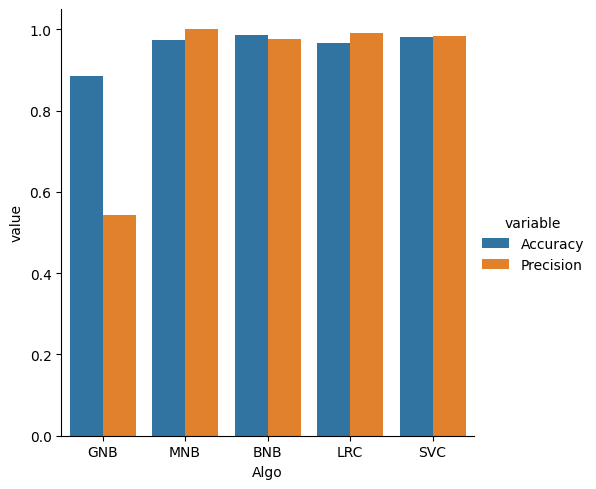

In [80]:
sns.catplot(x='Algo', y='value', hue='variable', data=performance_long_df, kind='bar', height=5)
plt.show()

__TfIdf --->> NaiveBayes(MultinomialNB)__